# Visualize, Evaluate and Compare Performance

## Table of Contents
- [1. Imports](#1-imports)
   - [1.1. Import Necessary Libraries](#11-import-necessary-libraries)
   - [1.2. Import Data](#12-import-data)
- [2. Visualizations](#2-visualizations)
   - [2.1. Average Best Fitness (per generation)](#21-average-best-fitness-(per-generation))
   - [2.2. Median Best Fitness (per generation)](#22-median-best-fitness-(per-generation))
   - [2.3. Best Fitness (per run)](#23-best-final-fitness-(per-run))
   - [2.4. Average Best Fitness of each mutation (per generation)](#24-average-best-fitness-of-each-mutation-(per-generation))
- [3. Metrics](#3-metrics)

## 1. Imports

### 1.1. Import Necessary Libraries

__`Step 1`__ Import necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

### 1.2. Import Data

__`Step 2`__ Import the data from our runs.

In [ ]:
df_exp1 = pd.read_csv('combination_search/final_results_exp1.csv')
df_exp2 = pd.read_csv('combination_search/final_results_exp2.csv')
#df_exp3 = pd.read_csv('combination_search/final_results_exp3.csv')

#df_elitism = pd.read_csv('combination_search/elitism_exp.csv')

#print(df_exp1.head())
#print(df_exp2.head())
#print(df_exp3.head())

#CORRIGIR NOMES

## 2. Visualizations

### 2.1. Average Best Fitness (per generation)

__`Step 3`__ Plot the average best fitness of each generation of each combination.

In [101]:
def plot_ABF(df, comb_col='Combination', gen_col='Generation',
             fitness_input_col='Fitness', fitness_col='Average_Best_Fitness',
             title='Best Fitness per Generation (Average)', palette_name='colorblind'):
    """
    Plots average best fitness per generation for each configuration.

    Parameters:
    - df: Dataset containing fitness data
    - comb_col: column representing the combination
    - gen_col: column representing the generation
    - fitness_input_col: column representing individual fitness values
    - fitness_col: column name to assign to the calculated median fitness
    - title: title of the plot
    - palette_name: seaborn color palette to use
    """

    # Compute median best fitness
    avg_df = df.groupby([comb_col, gen_col])[fitness_input_col].mean().reset_index()
    avg_df.rename(columns={fitness_input_col: fitness_col}, inplace=True)

    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    # Color mapping
    combs = df[comb_col].unique()
    palette = sns.color_palette(palette_name, len(combs))
    color_map = dict(zip(combs, palette))

    generations = sorted(df[gen_col].unique())

    # Plotting
    for comb in combs:
        data = avg_df[avg_df[comb_col] == comb]
        x_vals = list(range(len(generations)))
        y_vals = data[fitness_col].values

        plt.plot(x_vals, y_vals, linestyle='-', linewidth=2, color=color_map[comb], label=str(comb))
        plt.scatter(x_vals, y_vals, color=color_map[comb], zorder=5, s=20)

    plt.title(title, fontsize=14)
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Best Fitness', fontsize=12)
    plt.xticks(ticks=range(len(generations)), labels=generations)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(
        title=comb_col,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=True
    )
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

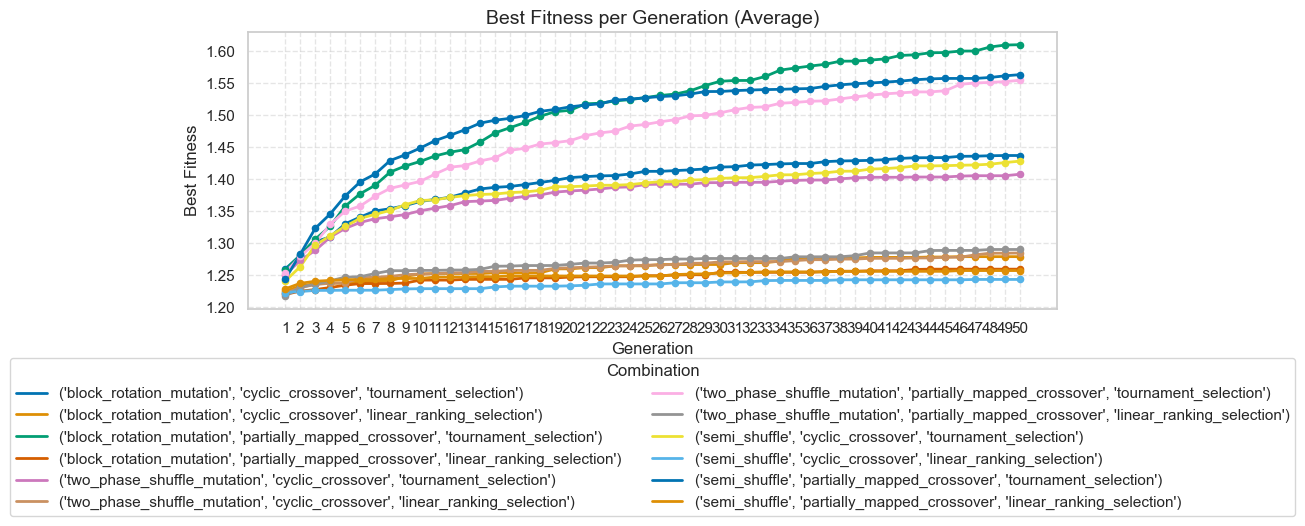

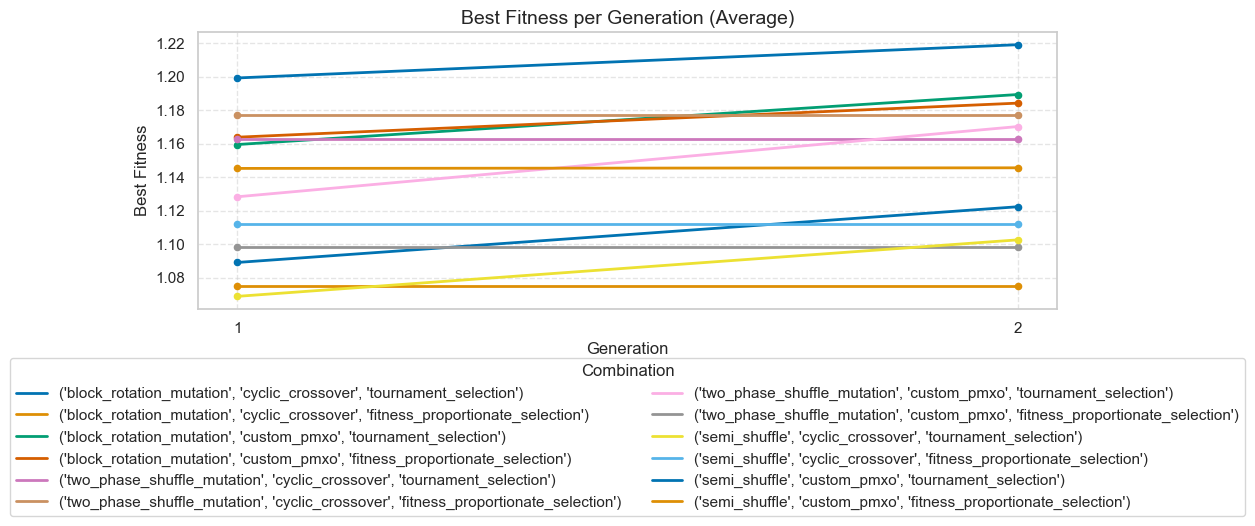

In [103]:
plot_ABF(df_exp1)
plot_ABF(df_exp2)

### 2.2. Median Best Fitness (per generation)

__`Step 4`__ Plot the median best fitness of each generation of each combination.

In [105]:
def plot_MBF(df, comb_col='Combination', gen_col='Generation',
             fitness_input_col='Fitness', fitness_col='Median_Best_Fitness',
             title='Best Fitness per Generation (Median)', palette_name='colorblind'):
    """
    Plots median best fitness per generation for each configuration.

    Parameters:
    - df: Dataset containing fitness data
    - comb_col: column representing the combination
    - gen_col: column representing the generation
    - fitness_input_col: column representing individual fitness values
    - fitness_col: column name to assign to the calculated median fitness
    - title: title of the plot
    - palette_name: seaborn color palette to use
    """

    # Compute median best fitness
    mvg_df = df.groupby([comb_col, gen_col])[fitness_input_col].median().reset_index()
    mvg_df.rename(columns={fitness_input_col: fitness_col}, inplace=True)

    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    # Color mapping
    combs = df[comb_col].unique()
    palette = sns.color_palette(palette_name, len(combs))
    color_map = dict(zip(combs, palette))

    generations = sorted(df[gen_col].unique())

    # Plotting
    for comb in combs:
        data = mvg_df[mvg_df[comb_col] == comb]
        x_vals = list(range(len(generations)))
        y_vals = data[fitness_col].values

        plt.plot(x_vals, y_vals, linestyle='-', linewidth=2, color=color_map[comb], label=str(comb))
        plt.scatter(x_vals, y_vals, color=color_map[comb], zorder=5, s=20)

    plt.title(title, fontsize=14)
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Best Fitness', fontsize=12)
    plt.xticks(ticks=range(len(generations)), labels=generations)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(
        title=comb_col,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=True
    )
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

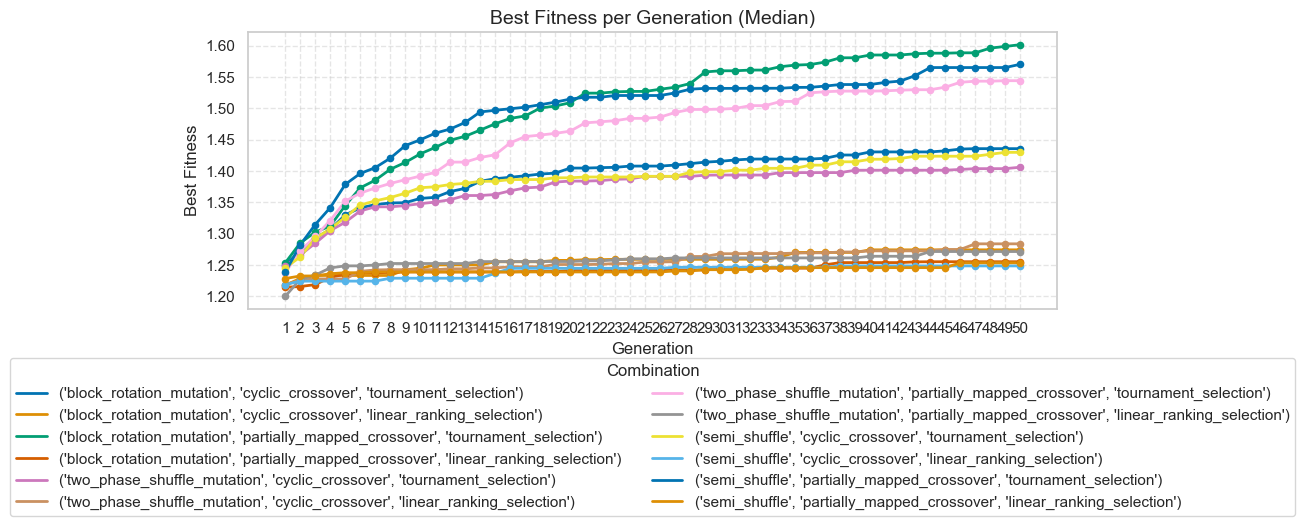

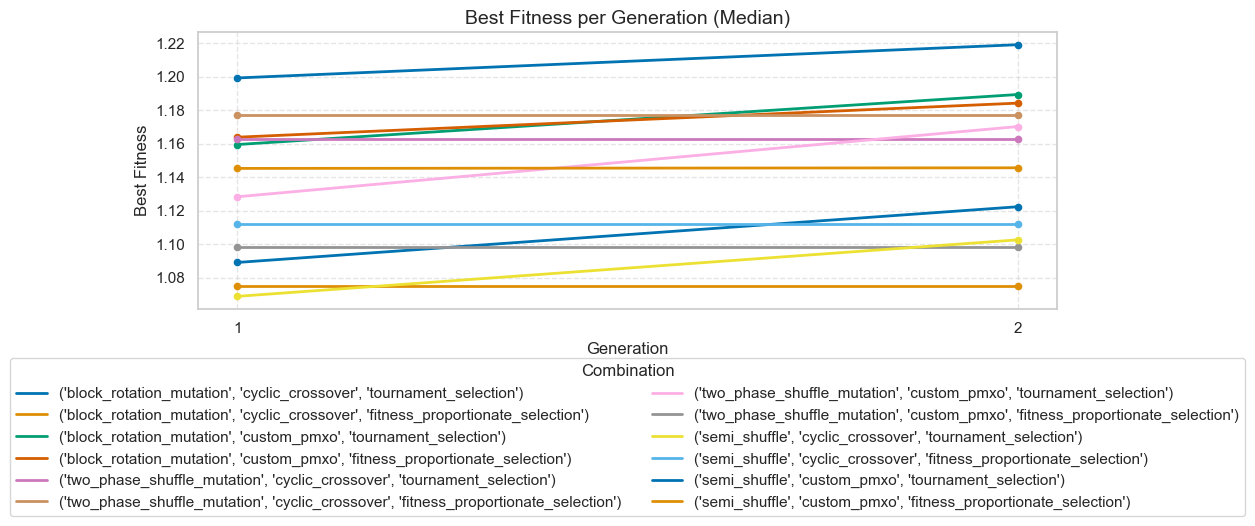

In [107]:
plot_MBF(df_exp1)
plot_MBF(df_exp2)

### 2.3. Best Fitness (per run)

__`Step 5`__ Plot the best fitness of each run of each combination.

In [117]:
def plot_BF_per_run(df, comb_col='Combination', run_col='Run',
                              fitness_col='Fitness', title='Best Fitness per Run',
                              palette_name='colorblind'):
    """
    Plots the best fitness per run for each configuration.

    Parameters:
    - df: Dataset containing fitness data
    - comb_col: column representing the combination
    - run_col: column name for run
    - fitness_col: column name for fitness values
    - title: tittle of the plot
    - palette_name: seaborn color palette to use
    """

    # Compute max fitness per run
    max_df = df.groupby([comb_col, run_col])[fitness_col].max().reset_index()

    # Setup
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    comb_order = df[comb_col].unique()
    run_order = sorted(df[run_col].unique())

    palette = sns.color_palette(palette_name, len(comb_order))
    color_map = dict(zip(comb_order, palette))

    # Plotting
    for comb in comb_order:
        comb_data = max_df[max_df[comb_col] == comb]
        x_vals = list(range(len(run_order)))
        y_vals = comb_data[fitness_col].values

        plt.plot(x_vals, y_vals, linestyle='-', linewidth=2, color=color_map[comb], label=str(config))
        plt.scatter(x_vals, y_vals, color=color_map[comb], zorder=5, s=30) 

    plt.title(title, fontsize=14)
    plt.xlabel('Run', fontsize=12)
    plt.ylabel('Best Fitness', fontsize=12)
    plt.xticks(ticks=range(len(run_order)), labels=run_order)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(
        title=comb_col,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=True
    )
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

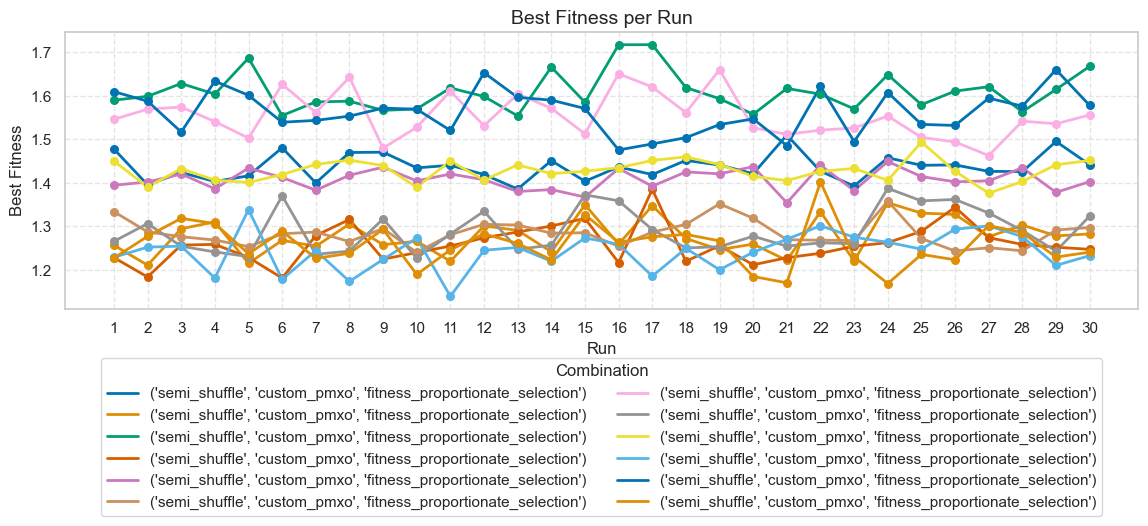

In [118]:
plot_BF_per_run(df_exp1)

### 2.4. Average Best Fitness of each mutation (per generation) 

__`Step 6`__ Plot the average best fitness of each combination per generation.

In [126]:
def plot_AF_per_gen_per_exp(
    *dfs,
    labels=None,
    gen_col='Generation',
    fitness_col='Fitness',
    title='Average Best Fitness per Generation (All Combinations)',
    palette_name='colorblind'
):
    """
    Plots average best fitness per generation for multiple experiments.

    Parameters:
    - *dfs: Any number of DataFrames (each representing one experiment)
    - labels: Optional list of labels for the experiments
    - gen_col: Generation
    - fitness_col: Fitness
    - title: tittle of the plot
    - palette_name: Seaborn color palette
    """

    if not dfs:
        raise ValueError("You must pass at least one DataFrame.")
    
    n_experiments = len(dfs)

    # Auto-generate labels if not provided
    if labels is None:
        labels = [f'Experiment {i+1}' for i in range(n_experiments)]
    elif len(labels) != n_experiments:
        raise ValueError("Number of labels must match number of DataFrames.")

    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    palette = sns.color_palette(palette_name, n_experiments)

    for idx, (label, df) in enumerate(zip(labels, dfs)):
        avg_df = df.groupby(gen_col)[fitness_col].mean().reset_index()
        x_vals = avg_df[gen_col]
        y_vals = avg_df[fitness_col]

        plt.plot(
            x_vals,
            y_vals,
            linestyle='-',
            linewidth=2,
            color=palette[idx],
            label=label
        )
        plt.scatter(
            x_vals,
            y_vals,
            color=palette[idx], 
            s=20,
            zorder=5
        )

    plt.title(title, fontsize=14)
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Best Fitness', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(
        title='Experiment',
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=min(3, n_experiments),
        frameon=True
    )
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

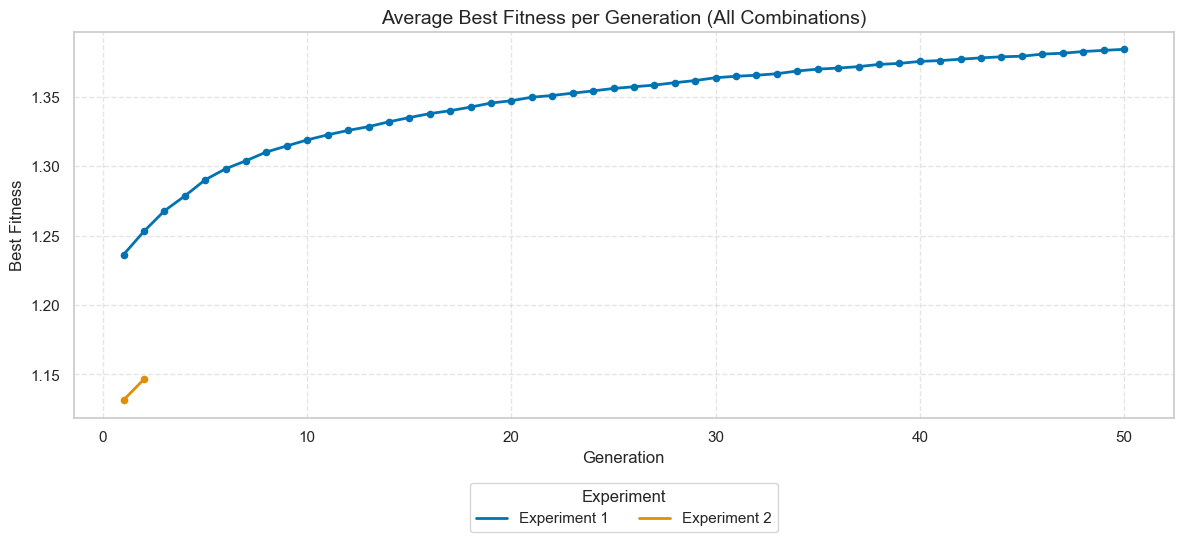

In [128]:
plot_AF_per_gen_per_exp(df_exp1, df_exp2)

## 3. Metrics

__`Step 7`__ Calculate the average of the best fitnesses per run per combination, calculate the standard deviation and the relation between them.

In [129]:
def get_abf_stats(df, fitness_col='Fitness', comb_col='Combination', run_col='Run'):
    """
    Computes the Average Best Fitness (ABF), standard deviation, and ABF-to-STD ratio 
    for each combination based on the best fitness per run.

    Parameters:
    - df: The input Dataset.
    - fitness_col: Column name for fitness values.
    - comb_col: Column name identifying each combination/configuration.
    - run_col: Column name identifying each run.

    Returns:
    - Dataset with ABF, standard deviation, and ABF/STD ratio per combination.
    """
    if not {comb_col, run_col, fitness_col}.issubset(df.columns):
        raise ValueError("Missing required columns in the input DataFrame.")

    # Compute max fitness per combination per run
    best_per_run = df.groupby([comb_col, run_col])[fitness_col].max().reset_index()

    # Compute mean and std for each combination
    abf_mean = best_per_run.groupby(comb_col)[fitness_col].mean().rename('ABF')
    abf_std = best_per_run.groupby(comb_col)[fitness_col].std().rename('STD')

    # Combine into single DataFrame
    abf_stats = pd.concat([abf_mean, abf_std], axis=1).reset_index()
    abf_stats['ABF/STD'] = abf_stats['ABF'] / abf_stats['STD']

    return abf_stats

In [131]:
get_abf_stats(df_exp1)

,Combination,ABF,STD,ABF/STD
0,"('block_rotation_mutation', 'cyclic_crossover'...",1.278492,0.041743,30.627655
1,"('block_rotation_mutation', 'cyclic_crossover'...",1.436627,0.030591,46.962975
2,"('block_rotation_mutation', 'partially_mapped_...",1.258933,0.044113,28.538627
3,"('block_rotation_mutation', 'partially_mapped_...",1.609877,0.044517,36.163397
4,"('semi_shuffle', 'cyclic_crossover', 'linear_r...",1.242853,0.043635,28.483168
5,"('semi_shuffle', 'cyclic_crossover', 'tourname...",1.427883,0.025023,57.063875
6,"('semi_shuffle', 'partially_mapped_crossover',...",1.256759,0.049787,25.242767
7,"('semi_shuffle', 'partially_mapped_crossover',...",1.563082,0.049363,31.664938
8,"('two_phase_shuffle_mutation', 'cyclic_crossov...",1.284225,0.029379,43.712327
9,"('two_phase_shuffle_mutation', 'cyclic_crossov...",1.407412,0.023752,59.255029


In [132]:
get_abf_stats(df_exp2)

,Combination,ABF,STD,ABF/STD
0,"('block_rotation_mutation', 'custom_pmxo', 'fi...",1.184165,0.044880,26.385099
1,"('block_rotation_mutation', 'custom_pmxo', 'to...",1.189310,0.031084,38.260654
2,"('block_rotation_mutation', 'cyclic_crossover'...",1.075240,0.037576,28.615337
3,"('block_rotation_mutation', 'cyclic_crossover'...",1.122315,0.062727,17.891930
4,"('semi_shuffle', 'custom_pmxo', 'fitness_propo...",1.145550,0.053302,21.491806
5,"('semi_shuffle', 'custom_pmxo', 'tournament_se...",1.219045,0.027344,44.582104
6,"('semi_shuffle', 'cyclic_crossover', 'fitness_...",1.111765,0.075427,14.739600
7,"('semi_shuffle', 'cyclic_crossover', 'tourname...",1.102550,0.055791,19.762245
8,"('two_phase_shuffle_mutation', 'custom_pmxo', ...",1.098070,0.045821,23.964591
9,"('two_phase_shuffle_mutation', 'custom_pmxo', ...",1.170190,0.034210,34.206254


## 4. Use of elitism

In [ ]:
#Assuming best fitness is at the 3rd column
def elistim_tuning_plot(df):
    df_true = df[df['Elitism']==True]
    df_false = df[df['Elitism']==False]
    final_fitness_per_run_T = []
    final_fitness_per_run_F = []
    for run in range(1, df['Run'].max()+1):
        df_t_runx = df_true[df_true['Run']==run]
        ff_t_runx = df_t_runx.iloc[-1, 3]
        df_f_runx = df_false[df_false['Run']==run]
        ff_f_runx = df_f_runx.iloc[-1, 3]
        final_fitness_per_run_T.append(ff_t_runx)
        final_fitness_per_run_F.append(ff_f_runx)

    fig = go.Figure()
    fig.add_trace(go.Box(
        y=final_fitness_per_run_T,
        boxpoints='all',
        jitter=0.5,
        pointpos=0,
        line=dict(color='orange'),
        name='With Elitism'
    ))

    fig.add_trace(go.Box(
        y=final_fitness_per_run_F,
        boxpoints='all',
        jitter=0.5,
        pointpos=0,
        line=dict(color='orange'),
        name='Without Elitism'
    ))

    fig.update_layout(
        title=f'Impact on the use of Elitism (Number of Runs: {df['Run'].max()})',
        xaxis_title='',
        yaxis_title='Final Fitness',
        height=500, width=1100,
        yaxis_range=[0,None],
        margin=dict(l=50, r=50, t=50, b=20),
        showlegend=False,
        template='plotly_white'
    )

    fig.show()

In [ ]:
#elistim_tuning_plot(df_elitism)